In [3]:
# Imports

from sqlalchemy import create_engine, text, inspect, Table
import pandas as pd

In [4]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (directory above the current directory)
parent_directory = os.path.dirname(current_directory)

# List all folders in the parent directory
folders_in_parent_directory = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Print the list of folders
print("Folders in the parent directory:")
for folder in folders_in_parent_directory:
    print(folder)

Folders in the parent directory:
opt
srv
root
media
home
tmp
var
dev
sbin
lib
etc
sys
libx32
run
proc
lib64
boot
lib32
usr
bin
mnt
notebook
data


In [5]:
weather_df = pd.read_csv("../data/weather/weather.csv", delimiter=",").drop(['index'],axis=1)
print(weather_df.head())

         date  temp_mean  temp_max  temp_min           sunrise  \
0  2015-01-01        3.1       5.2       1.6  2015-01-01T10:43   
1  2015-01-02        4.8       6.4       3.4  2015-01-02T10:43   
2  2015-01-03        3.2       3.9       2.3  2015-01-03T10:42   
3  2015-01-04        2.0       2.2       1.7  2015-01-04T10:41   
4  2015-01-05       -1.6       1.6      -4.7  2015-01-05T10:41   

             sunset  rain  snow        country    capital  
0  2015-01-01T16:43   0.0   0.0  Aland Islands  Mariehamn  
1  2015-01-02T16:45   9.5   0.0  Aland Islands  Mariehamn  
2  2015-01-03T16:46   0.6   0.0  Aland Islands  Mariehamn  
3  2015-01-04T16:48   0.0   0.0  Aland Islands  Mariehamn  
4  2015-01-05T16:49   0.0   0.0  Aland Islands  Mariehamn  


In [6]:
# Create a SQLAlchemy engine to connect to the PostgreSQL database
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")

# Establish a connection to the database using the engine
# The 'with' statement ensures that the connection is properly closed when done
with engine.connect() as conn:
    # Execute an SQL command to drop the 'population' table if it exists
    # The text() function allows you to execute raw SQL statements
    result = conn.execute(text("DROP TABLE IF EXISTS weather CASCADE;"))

# Assuming you have a DataFrame named 'world_population_df', the following line
# writes the data from the DataFrame to a new 'population' table in the database
# If the 'population' table already exists, it will be replaced with the new data
# This prints the number of rows entered in the database table
weather_df.to_sql("weather", engine, if_exists="replace", index=True)

368

In [ ]:
# Read data from the SQL table named 'population' using pandas
# 'pd.read_sql_table' is a pandas function that reads data from an SQL table
# 'db_conn' is the database connection object previously established
weather_table = pd.read_sql_table('weather', engine, index_col='index')

# This line prints the entire DataFrame to the output
print(weather_table)

              date  temp_mean  temp_max  temp_min           sunrise  \
index                                                                 
0       2015-01-01        3.1       5.2       1.6  2015-01-01T10:43   
1       2015-01-02        4.8       6.4       3.4  2015-01-02T10:43   
2       2015-01-03        3.2       3.9       2.3  2015-01-03T10:42   
3       2015-01-04        2.0       2.2       1.7  2015-01-04T10:41   
4       2015-01-05       -1.6       1.6      -4.7  2015-01-05T10:41   
...            ...        ...       ...       ...               ...   
185363  2023-09-27       27.5      33.5      22.2  2023-09-27T06:38   
185364  2023-09-28       27.7      33.8      22.0  2023-09-28T06:38   
185365  2023-09-29       26.8      32.1      23.0  2023-09-29T06:39   
185366  2023-09-30       25.6      29.6      22.9  2023-09-30T06:40   
185367  2023-10-01       23.8      28.1      21.5  2023-10-01T06:41   

                  sunset  rain  snow          country        capital  
index

In [8]:
import statistics

def mean_temp():
    query_1 = '''SELECT w.temp_mean
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND w.date LIKE '%s-%s___'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meantemp_int = table_1['temp_mean'].astype(int)
        meantemp_value = statistics.mean(meantemp_int)
        monthly_temp_data.append(meantemp_value)
        temp_date.append(formatted_date) 

def mean_rainfall():
    query_1 = '''SELECT w.rain
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND w.date LIKE '%s-%s___'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meanrain_float = table_1['rain'].astype(float)
        meanrain_value = statistics.mean(meanrain_float)
        monthly_rain_data.append(meanrain_value)
        rain_date.append(formatted_date) 

def mean_snow():
    query_1 = '''SELECT w.snow
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND w.date LIKE '%s-%s___'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meansnow_float = table_1['snow'].astype(float)
        meansnow_value = statistics.mean(meansnow_float)*10
        monthly_snow_data.append(meansnow_value)
        snow_date.append(formatted_date)
        
def mean_sunhours():
    query = '''
        SELECT 
        w.sunrise as sunrise_time,
        w.sunset as sunset_time
        FROM weather as w
        WHERE w.country = '%s'
        AND w.date LIKE '%s-%s___'
        ''' % (country_value, year, formatted_month)

    table_suntime = pd.read_sql(query, db_conn) if not query.isspace() else pd.DataFrame()
    table_suntime['sunrise_time'] = pd.to_datetime(table_suntime['sunrise_time'], format='%Y-%m-%dT%H:%M')
    table_suntime['sunset_time'] = pd.to_datetime(table_suntime['sunset_time'], format='%Y-%m-%dT%H:%M')

    table_suntime['time_difference'] = (table_suntime['sunset_time'] - table_suntime['sunrise_time']).dt.total_seconds() / 3600.0
    if not table_suntime.empty:
        meansuntime_value = statistics.mean(table_suntime['time_difference'])
        montly_sunhours_data.append(meansuntime_value)
        sunhours_date.append(formatted_date)                                   
        
db_conn = engine.connect()
country_value = 'United Kingdom'
temperature = True
rainfall = True
snowfall = True
sunhours = True

monthly_temp_data = []
temp_date = []
monthly_rain_data = []
rain_date = []
monthly_snow_data = []
snow_date = []
montly_sunhours_data = []
sunhours_date = []

for year in range(2015, 2024):
    for month in range(1, 13):
        formatted_month = str(month).zfill(2)
        formatted_date = f"{year}.{formatted_month}"
        
        if temperature:
            mean_temp()
            
        if rainfall:
            mean_rainfall()

        if snowfall:
            mean_snow()

        if sunhours:
            mean_sunhours()

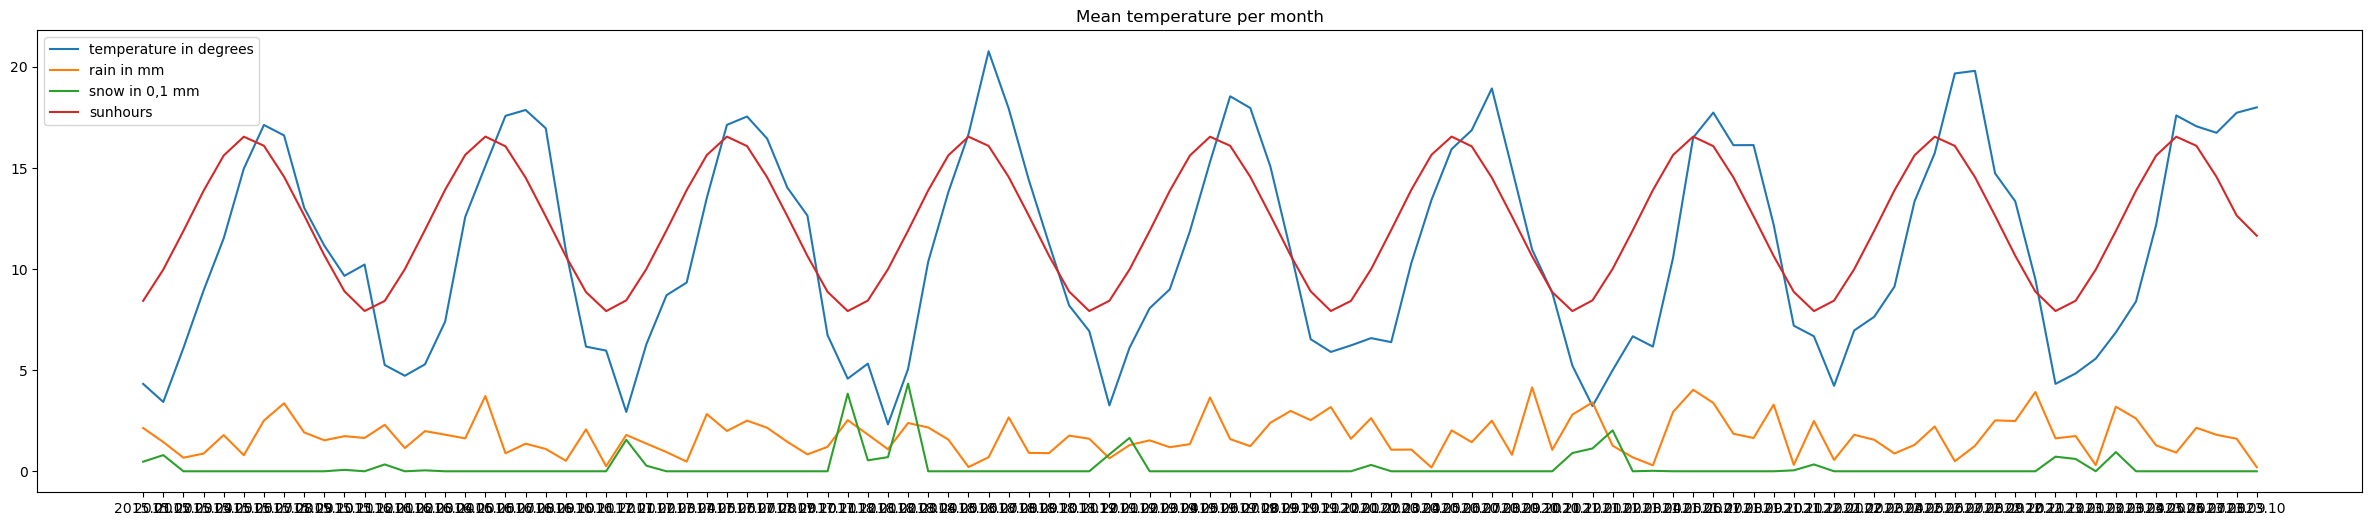

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(temp_date,monthly_temp_data, label='temperature in degrees')
ax.plot(rain_date, monthly_rain_data, label = 'rain in mm')
ax.plot(snow_date, monthly_snow_data, label = 'snow in 0,1 mm')
ax.plot(sunhours_date, montly_sunhours_data, label = 'sunhours')

ax.legend()

ax.set_title('Mean temperature per month')

plt.show()